<a href="https://colab.research.google.com/github/Maheen-M02/GreenSkillProjects/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML/ec_data.csv')
data.head()


,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [ ]:
data.isnull().sum()

,0
temperature,0
humidity,0
wind_speed,0
solar_irradiance,0
energy_consumption,0


In [ ]:
X = data[['temperature', 'humidity', 'wind_speed','solar_irradiance']].values
y = data['energy_consumption'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),# Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse',metrics = ['mae'])

In [ ]:
history= model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,verbose=1)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 15697.5098 - mae: 108.5437 - val_loss: 18399.6758 - val_mae: 119.1020
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15170.1426 - mae: 105.8463 - val_loss: 18273.9102 - val_mae: 118.5870
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14802.5811 - mae: 104.9958 - val_loss: 18236.3848 - val_mae: 118.0490
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14265.0146 - mae: 102.6448 - val_loss: 18161.1992 - val_mae: 118.1283
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14868.2773 - mae: 104.7886 - val_loss: 18134.3477 - val_mae: 118.1218
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14257.6006 - mae: 99.0683 - val_loss: 18568.1016 - val_mae: 119.5561
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15171.3770 - mae: 104.7671 - val_loss: 18392.8457 - val_mae: 118.9446
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15474.8691 - mae: 106.8955 - val_loss: 18253.09

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18536.0215 - mae: 117.3719 
Test Mean Absolute Error: 116.76


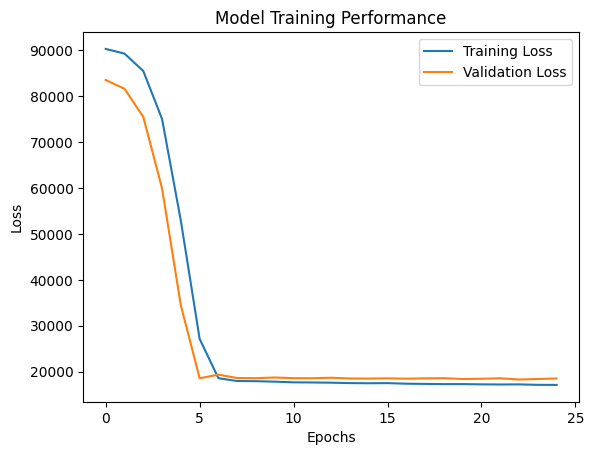

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[291.7996 ],
       [252.29295],
       [256.8991 ],
       [197.25565],
       [357.62137],
       [303.85864],
       [331.30997],
       [293.69632],
       [298.97122],
       [283.2868 ],
       [237.8241 ],
       [253.7454 ],
       [287.92444],
       [236.52989],
       [303.38156],
       [324.57272],
       [256.58777],
       [334.00143],
       [306.07175],
       [237.92824],
       [275.1486 ],
       [288.60062],
       [277.72476],
       [282.66568],
       [251.26053],
       [241.93474],
       [261.837  ],
       [321.8204 ],
       [320.10037],
       [272.0515 ],
       [232.94203],
       [321.47943],
       [297.4547 ],
       [266.4875 ],
       [313.6489 ],
       [299.5347 ],
       [208.15024],
       [260.83957],
       [281.03268],
       [244.4541 ],
       [244.21712],
       [249.26764],
       [255.29974],
       [257.22427],
       [273.28598],
       [258.2836 ],
       [265.46506],
       [265.1506 ],
       [300.0621 ],
       [307.19632],


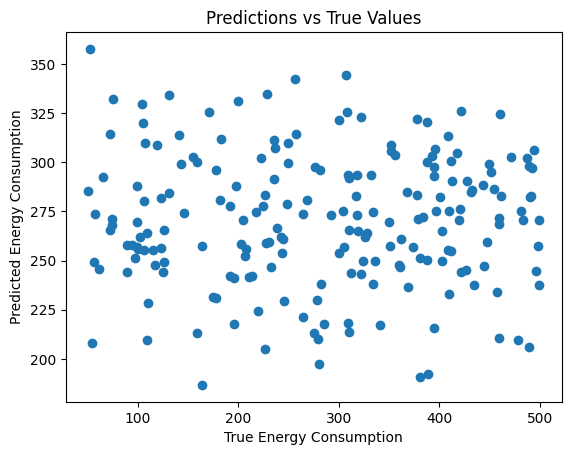

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()